In [ ]:
import torch

# Check if CUDA is available
device = torch.device('cpu')
if torch.cuda.is_available():
    device = torch.device('cuda')

torch.set_default_device(device)
print(f"Using device = {torch.get_default_device()}")

Using device = cuda:0


In [ ]:
import string
import unicodedata

allowed_characters = string.ascii_letters + " .,;'"
n_letters = len(allowed_characters)

# Turn a Unicode string to plain ASCII, thanks to https://stackoverflow.com/a/518232/2809427
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in allowed_characters
    )

In [ ]:
print (f"converting 'Ślusàrski' to {unicodeToAscii('Ślusàrski')}")

converting 'Ślusàrski' to Slusarski


In [ ]:
# Find letter index from all_letters, e.g. "a" = 0
def letterToIndex(letter):
    return allowed_characters.find(letter)

# Turn a line into a <line_length x 1 x n_letters>,
# or an array of one-hot letter vectors
def lineToTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li, letter in enumerate(line):
        tensor[li][0][letterToIndex(letter)] = 1
    return tensor

In [ ]:
print (f"The letter 'a' becomes {lineToTensor('a')}") #notice that the first position in the tensor = 1
print (f"The name 'Ahn' becomes {lineToTensor('Ahn')}") #notice 'A' sets the 27th index to 1

The letter 'a' becomes tensor([[[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]]], device='cuda:0')
The name 'Ahn' becomes tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [ ]:
!git clone https://github.com/spro/practical-pytorch.git
data_dir = "practical-pytorch/data/names"

# Check the files
import os
print(os.listdir(data_dir))

Cloning into 'practical-pytorch'...
remote: Enumerating objects: 393, done.
remote: Total 393 (delta 0), reused 0 (delta 0), pack-reused 393 (from 1)
Receiving objects: 100% (393/393), 1.67 MiB | 4.25 MiB/s, done.
Resolving deltas: 100% (170/170), done.
['Korean.txt', 'Chinese.txt', 'Scottish.txt', 'Polish.txt', 'Spanish.txt', 'Japanese.txt', 'Arabic.txt', 'Dutch.txt', 'German.txt', 'Greek.txt', 'Portuguese.txt', 'Russian.txt', 'Vietnamese.txt', 'Irish.txt', 'Italian.txt', 'Czech.txt', 'English.txt', 'French.txt']


In [ ]:
from io import open
import glob
import os
import time

import torch
from torch.utils.data import Dataset

class NamesDataset(Dataset):

    def __init__(self, data_dir):
        self.data_dir = data_dir #for provenance of the dataset
        self.load_time = time.localtime #for provenance of the dataset
        labels_set = set() #set of all classes

        self.data = []
        self.data_tensors = []
        self.labels = []
        self.labels_tensors = []

        #read all the ``.txt`` files in the specified directory
        text_files = glob.glob(os.path.join(data_dir, '*.txt'))
        for filename in text_files:
            label = os.path.splitext(os.path.basename(filename))[0]
            labels_set.add(label)
            lines = open(filename, encoding='utf-8').read().strip().split('\n')
            for name in lines:
                self.data.append(name)
                self.data_tensors.append(lineToTensor(name))
                self.labels.append(label)

        #Cache the tensor representation of the labels
        self.labels_uniq = list(labels_set)
        for idx in range(len(self.labels)):
            temp_tensor = torch.tensor([self.labels_uniq.index(self.labels[idx])], dtype=torch.long)
            self.labels_tensors.append(temp_tensor)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        data_item = self.data[idx]
        data_label = self.labels[idx]
        data_tensor = self.data_tensors[idx]
        label_tensor = self.labels_tensors[idx]

        return label_tensor, data_tensor, data_label, data_item

In [ ]:
alldata = NamesDataset("practical-pytorch/data/names")
print(f"loaded {len(alldata)} items of data")
print(f"example = {alldata[0]}")

loaded 20050 items of data
example = (tensor([10], device='cuda:0'), tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]]], device='cuda:0'), 'Korean', 'Ahn')


In [ ]:
train_set, test_set = torch.utils.data.random_split(alldata, [.85, .15], generator=torch.Generator(device=device).manual_seed(2024))

print(f"train examples = {len(train_set)}, validation examples = {len(test_set)}")

train examples = 17043, validation examples = 3007


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CustomRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(CustomRNN, self).__init__()

        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Weight matrices for input-to-hidden and hidden-to-hidden connections
        self.Wx = nn.Parameter(torch.randn(hidden_size, input_size) * 0.01)  # Input to hidden
        self.Wh = nn.Parameter(torch.randn(hidden_size, hidden_size) * 0.01)  # Hidden to hidden
        self.bh = nn.Parameter(torch.zeros(hidden_size))  # Bias for hidden state

        # Output layer
        self.Wy = nn.Parameter(torch.randn(output_size, hidden_size) * 0.01)  # Hidden to output
        self.by = nn.Parameter(torch.zeros(output_size))  # Bias for output

    def forward(self, input_tensor, hidden):
        """
        Forward pass for one time step
        input_tensor: (batch_size, input_size)
        hidden: (batch_size, hidden_size)
        """
        hidden = torch.tanh(torch.mm(input_tensor, self.Wx.T) + torch.mm(hidden, self.Wh.T) + self.bh)
        output = torch.mm(hidden, self.Wy.T) + self.by  # No activation (raw scores)
        output = F.log_softmax(output, dim=1)  # Apply softmax to get probabilities

        return output, hidden

    def init_hidden(self, batch_size):
        """Initialize hidden state to zeros"""
        return torch.zeros(batch_size, self.hidden_size)

In [ ]:
# Define model
input_size = 57  # Example: Number of characters in the input encoding
hidden_size = 128  # Adjust as needed
output_size = 18  # Example: Number of classes
batch_size = 1  # Example: Batch size
model = CustomRNN(input_size, hidden_size, output_size)

# Create an example input tensor - replace with your actual data
# Assuming your input is a sequence of one-hot encoded characters
# of length 'seq_len'
seq_len = 10  # Example sequence length
input_tensor = torch.zeros(batch_size, seq_len, input_size)
# Fill input_tensor with your actual data

hidden = model.init_hidden(batch_size)

# Now you can pass the input_tensor to the model
# You'll likely need to iterate over the sequence length (seq_len)
# in a loop for a real RNN implementation.
# For now, we'll just use the first element of the sequence.
output, hidden = model(input_tensor[:, 0, :], hidden)


In [ ]:
print(model)

CustomRNN()


In [ ]:
def label_from_output(output, output_labels):
    top_n, top_i = output.topk(1)
    label_i = top_i[0].item()
    return output_labels[label_i], label_i

input = lineToTensor('Albert')
hidden = model.init_hidden(1) # Initialize the hidden state
output, hidden = model(input[0], hidden) # Pass the first element of the input sequence and hidden state
# Iterate over the rest of the sequence if you need to process the entire sequence
for i in range(1, len(input)):
    output, hidden = model(input[i], hidden)
print(output)
print(label_from_output(output, alldata.labels_uniq))

tensor([[-2.8916, -2.8906, -2.8900, -2.8900, -2.8903, -2.8889, -2.8897, -2.8889,
         -2.8905, -2.8906, -2.8911, -2.8895, -2.8913, -2.8902, -2.8913, -2.8929,
         -2.8890, -2.8903]], device='cuda:0', grad_fn=<LogSoftmaxBackward0>)
('German', 5)


In [ ]:
import random
import numpy as np

def train(rnn, training_data, n_epoch = 10, n_batch_size = 64, report_every = 50, learning_rate = 0.2, criterion = nn.NLLLoss()):
    """
    Learn on a batch of training_data for a specified number of iterations and reporting thresholds
    """
    # Keep track of losses for plotting
    current_loss = 0
    all_losses = []
    rnn.train()
    optimizer = torch.optim.SGD(rnn.parameters(), lr=learning_rate)

    start = time.time()
    print(f"training on data set with n = {len(training_data)}")

    for iter in range(1, n_epoch + 1):
        rnn.zero_grad() # clear the gradients

        # create some minibatches
        # we cannot use dataloaders because each of our names is a different length
        batches = list(range(len(training_data)))
        random.shuffle(batches)
        batches = np.array_split(batches, len(batches) //n_batch_size )

        for idx, batch in enumerate(batches):
            batch_loss = 0
            for i in batch: #for each example in this batch
                (label_tensor, text_tensor, label, text) = training_data[i]
                # Initialize hidden state for each sequence in the batch
                hidden = rnn.init_hidden(1)  # Assuming batch_size = 1 for each sequence

                # Iterate over the sequence length
                for j in range(text_tensor.size(0)):
                    output, hidden = rnn.forward(text_tensor[j], hidden)

                loss = criterion(output, label_tensor)
                batch_loss += loss

            # optimize parameters
            batch_loss.backward()
            nn.utils.clip_grad_norm_(rnn.parameters(), 3)
            optimizer.step()
            optimizer.zero_grad()

            current_loss += batch_loss.item() / len(batch)

        all_losses.append(current_loss / len(batches) )
        if iter % report_every == 0:
            print(f"{iter} ({iter / n_epoch:.0%}): \t average batch loss = {all_losses[-1]}")
        current_loss = 0

    return all_losses

In [ ]:
start = time.time()
all_losses = train(model, train_set, n_epoch=27, learning_rate=0.15, report_every=5)
end = time.time()
print(f"training took {end-start}s")

training on data set with n = 17043
5 (19%): 	 average batch loss = 0.9189288170369393
10 (37%): 	 average batch loss = 0.7315428051819616
15 (56%): 	 average batch loss = 0.6202396043812767
20 (74%): 	 average batch loss = 0.5397565689431304
25 (93%): 	 average batch loss = 0.4768610866351442
training took 1516.8941812515259s


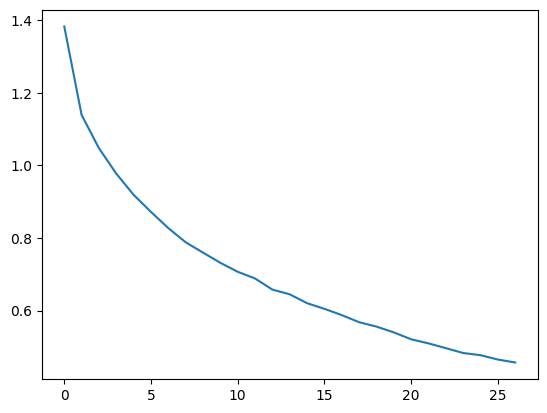

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)
plt.show()

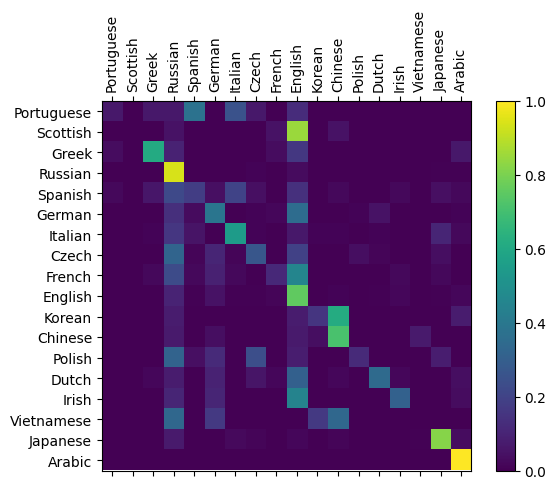

In [ ]:
def evaluate(rnn, testing_data, classes):
    confusion = torch.zeros(len(classes), len(classes))

    rnn.eval() #set to eval mode
    with torch.no_grad(): # do not record the gradients during eval phase
        for i in range(len(testing_data)):
            (label_tensor, text_tensor, label, text) = testing_data[i]

            # Initialize hidden state for each sequence
            hidden = rnn.init_hidden(1)

            # Iterate over the sequence length
            for j in range(text_tensor.size(0)):
                output, hidden = rnn(text_tensor[j], hidden)  # Pass hidden state here

            guess, guess_i = label_from_output(output, classes)
            label_i = classes.index(label)
            confusion[label_i][guess_i] += 1

    # Normalize by dividing every row by its sum
    for i in range(len(classes)):
        denom = confusion[i].sum()
        if denom > 0:
            confusion[i] = confusion[i] / denom

    # Set up plot
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(confusion.cpu().numpy()) #numpy uses cpu here so we need to use a cpu version
    fig.colorbar(cax)

    # Set up axes
    ax.set_xticks(np.arange(len(classes)), labels=classes, rotation=90)
    ax.set_yticks(np.arange(len(classes)), labels=classes)

    # Force label at every tick
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

    # sphinx_gallery_thumbnail_number = 2
    plt.show()



evaluate(model, test_set, classes=alldata.labels_uniq)